In [1]:
import pandas as pd

In [2]:
from PIL import Image
import requests

In [98]:
df1 = pd.read_csv('/work/ptyagi/masterthesis/data/test/new_annotation.csv')
df1.drop_duplicates(subset='conversation_id', inplace=True)

In [99]:
import os

directory_path = '/work/ptyagi/ClimateVisions/Images/2019/02_February'
target_ids = df1['conversation_id'].to_list()

matched_files = []

In [100]:
for filename in os.listdir(directory_path):
    parts = filename.split('_')
    if len(parts) > 1:
        file_id = parts[1] 
        if int(file_id) in target_ids:
            matched_files.append(filename)

print("Matched files:", matched_files)

Matched files: ['id_1100154569663733760_2019-02-25.jpg', 'id_1099783621609750528_2019-02-24.jpg', 'id_1096394414262575104_2019-02-15.jpg', 'id_1100410157895315457_2019-02-26.jpg', 'id_1096869493710774274_2019-02-16.jpg', 'id_1099877122741399553_2019-02-25.jpg', 'id_1098307837002948614_2019-02-20.jpg', 'id_1100009415518900224_2019-02-25.jpg', 'id_1099081974658953216_2019-02-22.jpg', 'id_1096905080475774976_2019-02-16.jpg', 'id_1096411802932600832_2019-02-15.jpg', 'id_1098244406086377472_2019-02-20.jpg', 'id_1100726004031488000_2019-02-27.jpg', 'id_1096494783256846339_2019-02-15.jpg', 'id_1096512870945341440_2019-02-15.jpg', 'id_1097045226823139328_2019-02-17.jpg', 'id_1096435275142742016_2019-02-15.jpg', 'id_1098754051800391680_2019-02-22.jpg', 'id_1100429920596045825_2019-02-26.jpg', 'id_1099058268280741889_2019-02-22.jpg', 'id_1100522521173086209_2019-02-26.jpg', 'id_1096384227707404288_2019-02-15.jpg', 'id_1099918265005080578_2019-02-25.jpg', 'id_1099231725689978880_2019-02-23.jpg', 

In [101]:
len(matched_files)

67

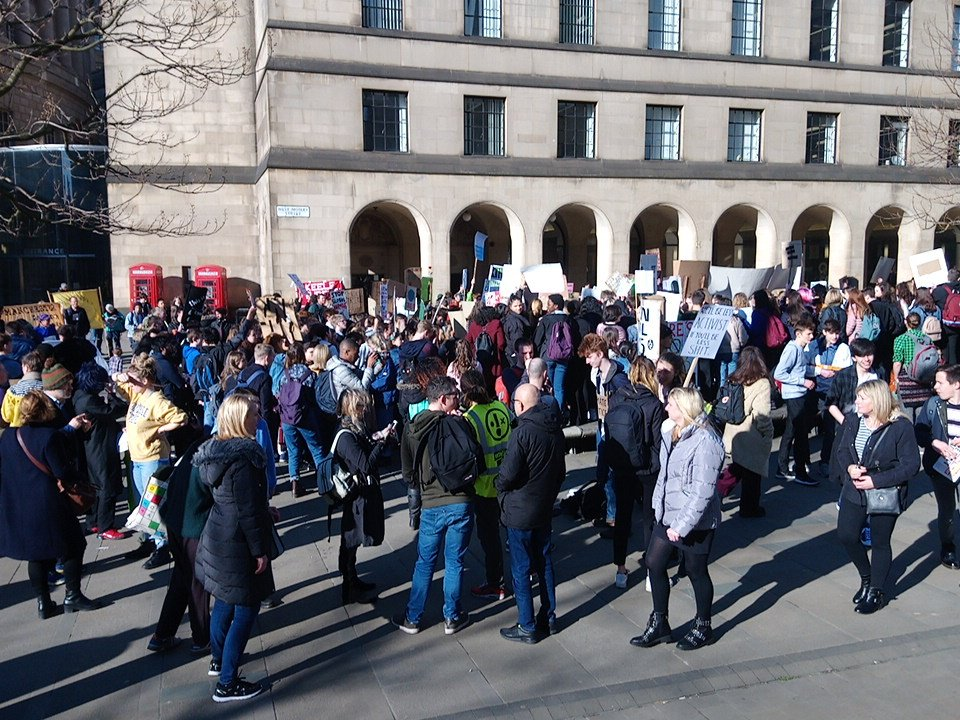

In [102]:
path = "/work/ptyagi/ClimateVisions/Images/2019/02_February/id_1096394414262575104_2019-02-15.jpg"
image = Image.open(path)
image

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import os

model_id = "vikhyatk/moondream2"
revision = "2024-08-26"
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)


In [ ]:
model.to('cuda:4')

In [113]:
results = []
for filename in matched_files:
    file_path = os.path.join(directory_path, filename)
    if os.path.exists(file_path):  
        try:
            image = Image.open(file_path)
            enc_image = model.encode_image(image)
            result = model.answer_question(enc_image, "What emotion would this image invoke in the public? Choices: sadness, anger, fear, disgust, surprise, joy.", tokenizer)
            results.append((filename.split('_')[1],result))
            print(f"{filename}: {result}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    else:
        print(f"File {filename} does not exist in the directory.")

id_1100154569663733760_2019-02-25.jpg: sadness
id_1099783621609750528_2019-02-24.jpg: Sadness
id_1096394414262575104_2019-02-15.jpg: Sadness
id_1100410157895315457_2019-02-26.jpg: Joy
id_1096869493710774274_2019-02-16.jpg: Disgust
id_1099877122741399553_2019-02-25.jpg: Joy
id_1098307837002948614_2019-02-20.jpg: Sadness
id_1100009415518900224_2019-02-25.jpg: Sadness
id_1099081974658953216_2019-02-22.jpg: Joy
id_1096905080475774976_2019-02-16.jpg: Disgust
id_1096411802932600832_2019-02-15.jpg: Disgust
id_1098244406086377472_2019-02-20.jpg: Disgust
id_1100726004031488000_2019-02-27.jpg: Joy
id_1096494783256846339_2019-02-15.jpg: Anger
id_1096512870945341440_2019-02-15.jpg: Disgust
id_1097045226823139328_2019-02-17.jpg: Disgust
id_1096435275142742016_2019-02-15.jpg: Disgust
id_1098754051800391680_2019-02-22.jpg: Sadness
id_1100429920596045825_2019-02-26.jpg: Disgust
id_1099058268280741889_2019-02-22.jpg: Joy
id_1100522521173086209_2019-02-26.jpg: Sadness
id_1096384227707404288_2019-02-15.j

In [114]:
dff = pd.DataFrame(results, columns=['conversation_id','moondream_label'])

In [115]:
dff['conversation_id'] = dff['conversation_id'].astype(int)

In [116]:
dff['moondream_label'] = dff['moondream_label'].str.lower()

In [117]:
merged_df = pd.merge(df1, dff, on='conversation_id')

In [118]:
merged_df

,id,conversation_id,manual_label,replies,moondream_label
0,1097968284102733825,1097912551038439430,anger,seriously this is bs climate change is called ...,sadness
1,1100028581311381506,1099918265005080578,sadness,hello ladies and gentleman i did a poem known ...,disgust
2,1098431395314192384,1097987884097900544,fear,climate change is real and nature will respond...,sadness
3,1100462023278821377,1100154569663733760,surprise,i can not wait right now for the climate chang...,sadness
4,1099798892596678657,1099783621609750528,anger,is too stupid to understand maybe if they watc...,sadness
...,...,...,...,...,...
62,1100327956101107712,1100154481923231744,sadness,it is disappointing that is only getting the o...,disgust
63,1098211920883134464,1097929560501485568,anger,in the age of science denial who is dumber tha...,joy
64,1100510336766103552,1100429920596045825,anger,politicians amp civil servants can not sort br...,disgust
65,1100471678512103425,1100471665119674368,fear,also our intel community sannual report which ...,sadness


In [119]:
def exact_match(row, col):
    return row['manual_label'] == row[col]

In [120]:
merged_df.apply(exact_match, col='moondream_label', axis=1).value_counts()

False    59
True      8
Name: count, dtype: int64

In [112]:
merged_df[['conversation_id','moondream_label']].to_csv('/work/ptyagi/masterthesis/data/test/images/image_annotation.csv', index=False)

In [110]:
import shutil

def copy_files(file_list, source_dir, destination_dir):

    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    
    for file_name in file_list:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
            print(f"Copied: {file_name}")
        else:
            print(f"File not found: {file_name}")

source_dir = '/work/ptyagi/ClimateVisions/Images/2019/02_February'
destination_dir = '/work/ptyagi/masterthesis/data/test/images'

copy_files(matched_files, source_dir, destination_dir)

Copied: id_1100154569663733760_2019-02-25.jpg
Copied: id_1099783621609750528_2019-02-24.jpg
Copied: id_1096394414262575104_2019-02-15.jpg
Copied: id_1100410157895315457_2019-02-26.jpg
Copied: id_1096869493710774274_2019-02-16.jpg
Copied: id_1099877122741399553_2019-02-25.jpg
Copied: id_1098307837002948614_2019-02-20.jpg
Copied: id_1100009415518900224_2019-02-25.jpg
Copied: id_1099081974658953216_2019-02-22.jpg
Copied: id_1096905080475774976_2019-02-16.jpg
Copied: id_1096411802932600832_2019-02-15.jpg
Copied: id_1098244406086377472_2019-02-20.jpg
Copied: id_1100726004031488000_2019-02-27.jpg
Copied: id_1096494783256846339_2019-02-15.jpg
Copied: id_1096512870945341440_2019-02-15.jpg
Copied: id_1097045226823139328_2019-02-17.jpg
Copied: id_1096435275142742016_2019-02-15.jpg
Copied: id_1098754051800391680_2019-02-22.jpg
Copied: id_1100429920596045825_2019-02-26.jpg
Copied: id_1099058268280741889_2019-02-22.jpg
Copied: id_1100522521173086209_2019-02-26.jpg
Copied: id_1096384227707404288_201

In [1]:
import pandas as pd
df = pd.read_csv("/work/ptyagi/masterthesis/data/test_predictions_with_metrics_multi.csv")

In [2]:
df

,conversation_id,predictions,cosine_similarity_model,kl_divergence,mean_squared_error
0,1096448460583260161,"[('anger', 0.06251640617847443), ('sadness', 0...",0.572058,0.465023,0.040149
1,1096541711847833601,"[('anger', 0.10931407660245895), ('sadness', 0...",0.769702,0.281330,0.020871
2,1095943507779305472,"[('anger', 0.10328623652458191), ('sadness', 0...",0.860980,0.262726,0.014989
3,1096757339749679104,"[('anger', 0.10246411710977554), ('sadness', 0...",0.841554,0.204232,0.010192
4,1100430895083868160,"[('anger', 0.0958344042301178), ('sadness', 0....",0.518807,0.703300,0.040995
...,...,...,...,...,...
163,1100873906594959360,"[('anger', 0.0943947434425354), ('sadness', 0....",0.889753,0.124676,0.007701
164,1098639572316160001,"[('anger', 0.05107546225190163), ('sadness', 0...",0.364953,0.898039,0.068457
165,1100522521047252993,"[('anger', 0.07812617719173431), ('sadness', 0...",0.972629,0.037406,0.001757
166,1096408542297423872,"[('anger', 0.047963209450244904), ('sadness', ...",0.487106,0.588370,0.051766


In [3]:
df["cosine_similarity_model"].mean()

0.7933181948214286

In [4]:
df = pd.read_csv("/work/ptyagi/masterthesis/data/test_predictions_with_metrics_text.csv")

In [5]:
df["cosine_similarity_model"].mean()

0.7393239622023811

In [7]:
df = pd.read_csv("/work/ptyagi/masterthesis/data/test_predictions_with_metrics_image.csv")

In [8]:
df["cosine_similarity_model"].mean()

0.7822285914285714